# Laboratorio 5: Análisis de sentimientos

### Mario de León 19019
### Javier Valle 20159

# Ejercicio 1: Descargar el archivo test.csv.

# Ejercicio 2: Cargue los archivos de datos a R o a Python, dependiendo de con qué trabaje. 

### Imports necesarios

In [22]:
import pandas as pd
import re
import nltk
from nltk import word_tokenize, bigrams
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk import ngrams
from wordcloud import WordCloud
from textblob import TextBlob

In [2]:
# Cargar el dataset desde un archivo CSV

train = pd.read_csv("train.csv")

# Cargando las primeras 5 filas del dataset.

print("train")
print(train.head())

train
   id keyword location                                               text   
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...  \
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  


# Ejercicio 3: Limpie y preprocese los datos. Describa de forma detallada las actividades de preprocesamiento que llevó a cabo.

### Convertir el texto a mayúsculas o minúsculas para poder estandarizar un poco el texto y no tener problema con cambios de tamaño.

In [3]:
# Convertir el texto a mayúsculas o minúsculas.

# Convertiendo todas las columnas de texto a minúsculas del dataset train.
train = train.apply(lambda x: x.astype(str).str.lower() if x.dtype == "object" else x)

# Imprimiendo el DataFrame resultante
print(train)

         id keyword location   
0         1     nan      nan  \
1         4     nan      nan   
2         5     nan      nan   
3         6     nan      nan   
4         7     nan      nan   
...     ...     ...      ...   
7608  10869     nan      nan   
7609  10870     nan      nan   
7610  10871     nan      nan   
7611  10872     nan      nan   
7612  10873     nan      nan   

                                                   text  target  
0     our deeds are the reason of this #earthquake m...       1  
1                forest fire near la ronge sask. canada       1  
2     all residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     just got sent this photo from ruby #alaska as ...       1  
...                                                 ...     ...  
7608  two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @thetawniest the out of control w...       1  
7610  m1.94 [01:04 ut

### Quitando caracteres especiales para dejar nada más caracteres del alfabeto. (a - z).

In [4]:
# Función para limpiar los caracteres especiales
def clean_text(text):
    if isinstance(text, str):
        # Eliminar caracteres no alfanuméricos excepto espacios
        cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
        return cleaned_text
    else:
        return text

# Aplicando la función a todas las columnas de texto del df train.
train = train.applymap(clean_text)

# Imprimir df resultante
print(train)

         id keyword location   
0         1     nan      nan  \
1         4     nan      nan   
2         5     nan      nan   
3         6     nan      nan   
4         7     nan      nan   
...     ...     ...      ...   
7608  10869     nan      nan   
7609  10870     nan      nan   
7610  10871     nan      nan   
7611  10872     nan      nan   
7612  10873     nan      nan   

                                                   text  target  
0     our deeds are the reason of this earthquake ma...       1  
1                 forest fire near la ronge sask canada       1  
2     all residents asked to shelter in place are be...       1  
3     13000 people receive wildfires evacuation orde...       1  
4     just got sent this photo from ruby alaska as s...       1  
...                                                 ...     ...  
7608  two giant cranes holding a bridge collapse int...       1  
7609  ariaahrary thetawniest the out of control wild...       1  
7610  m194 0104 utc5k

### Describiendo los datos para validar que todo haya quedad con el formato correcto.

In [5]:
# Obteneniendo estadísticas sobre las longitudes de los textos en la columna "keyword"
train['tweet_length'] = train['text'].apply(len)  # Agregando una columna con las longitudes de los textos
text_stats = train['tweet_length'].describe()

# Obteneniedo la cantidad de categorías únicas en la columna "location"
location_unique_count = test['location'].nunique()

# Imprimiendo las estadísticas de longitud de textos y la cantidad de categorías únicas en la ubicación
print("Estadísticas de longitud de textos:\n", text_stats)
print("\nCantidad de categorías únicas en base al texto:", location_unique_count)

NameError: name 'test' is not defined

### Haciendo estadísticas de los datos y enseñando ciertas gráficas como palabras más frecuentes y longitudes de textos en el csv.

Estadísticas de longitud de textos:
 count    7613.000000
mean        8.533824
std         3.208316
min         3.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        20.000000
Name: tweet_length, dtype: float64

Cantidad de categorías únicas en la ubicación: 1518
Estadísticas de longitud de textos:
 count    7613.000000
mean        8.533824
std         3.208316
min         3.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        20.000000
Name: tweet_length, dtype: float64

Cantidad de categorías únicas en base al texto: 1518


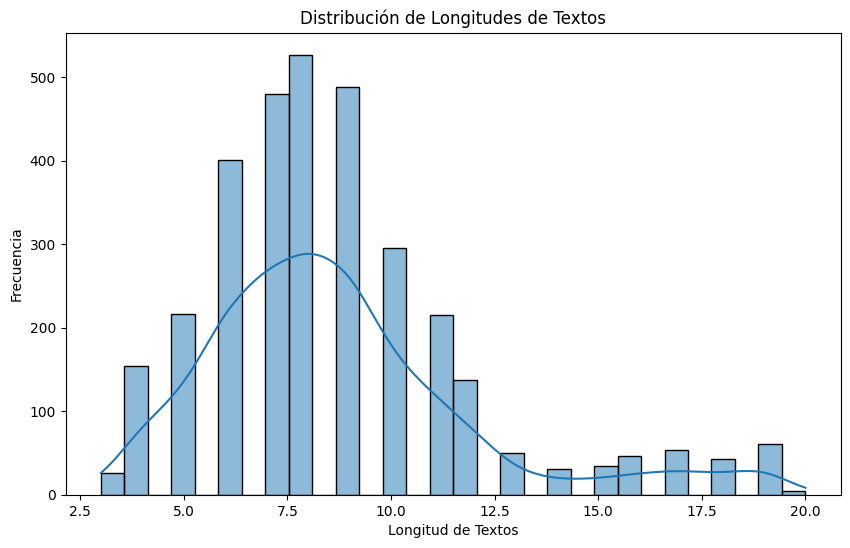

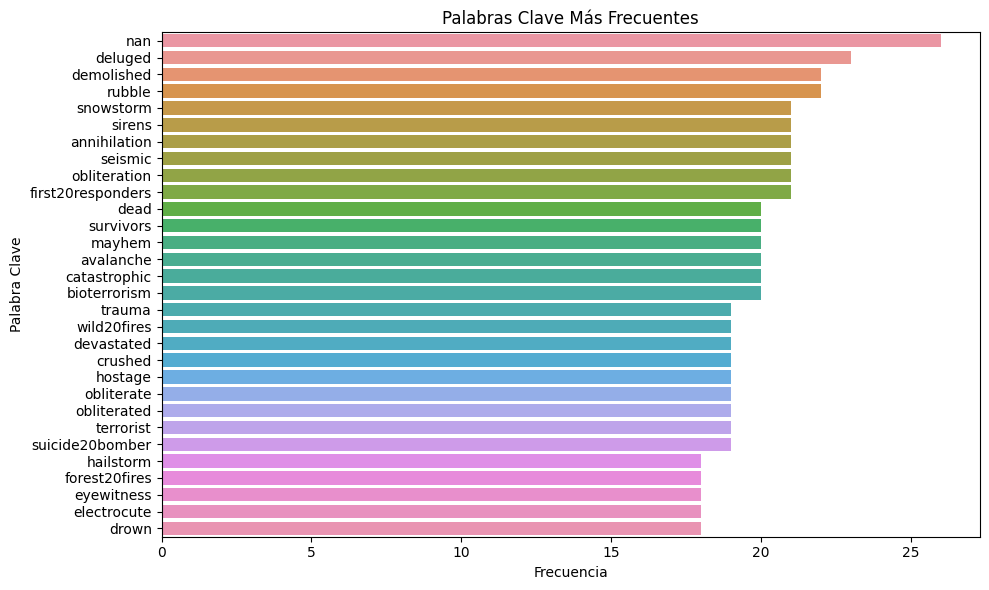

In [ ]:
# Obteneniendo estadísticas sobre las longitudes de los textos en la columna "keyword"
train['tweet_length'] = train['keyword'].apply(len)  # Agregando una columna con las longitudes de los textos
text_stats = train['tweet_length'].describe()

# Obteneniedo la cantidad de categorías únicas en la columna "location"
location_unique_count = test['location'].nunique()

# Imprimiendo las estadísticas de longitud de textos y la cantidad de categorías únicas en la ubicación
print("Estadísticas de longitud de textos:\n", text_stats)
print("\nCantidad de categorías únicas en la ubicación:", location_unique_count)

# Obteneniedo la cantidad de categorías únicas en la columna "location"
location_unique_count = test['location'].nunique()

# Imprimiendo las estadísticas de longitud de textos y la cantidad de categorías únicas en la ubicación
print("Estadísticas de longitud de textos:\n", text_stats)
print("\nCantidad de categorías únicas en base al texto:", location_unique_count)


# Gráfico de histograma de longitudes de textos
plt.figure(figsize=(10, 6))
sns.histplot(test['tweet_length'], bins=30, kde=True)
plt.title('Distribución de Longitudes de Textos')
plt.xlabel('Longitud de Textos')
plt.ylabel('Frecuencia')
plt.show()


# Calcular la frecuencia de las palabras clave
keyword_freq = test['keyword'].value_counts()

# Seleccionar las palabras clave más frecuentes.
top_keywords = keyword_freq.head(30)

# Crear un gráfico de barras de las palabras clave más frecuentes
plt.figure(figsize=(10, 6))
sns.barplot(x=top_keywords.values, y=top_keywords.index)
plt.title('Palabras Clave Más Frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra Clave')
plt.tight_layout()
plt.show()

### Creando un modelo predictor.

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Exactitud del modelo: 0.8614576493762311
Informe de clasificación:
                       precision    recall  f1-score   support

              ablaze       1.00      1.00      1.00         9
            accident       1.00      0.69      0.82        13
          aftershock       0.43      0.60      0.50         5
  airplane20accident       1.00      1.00      1.00         6
           ambulance       1.00      0.90      0.95        10
         annihilated       1.00      1.00      1.00         9
        annihilation       1.00      0.88      0.93         8
          apocalypse       0.67      0.67      0.67         3
          armageddon       1.00      0.90      0.95        10
                army       0.89      1.00      0.94         8
               arson       0.67      1.00      0.80         4
            arsonist       0.00      0.00      0.00         9
              attack       1.00      0.80      0.89        10
            attacked       0.92      1.00      0.96        11
 

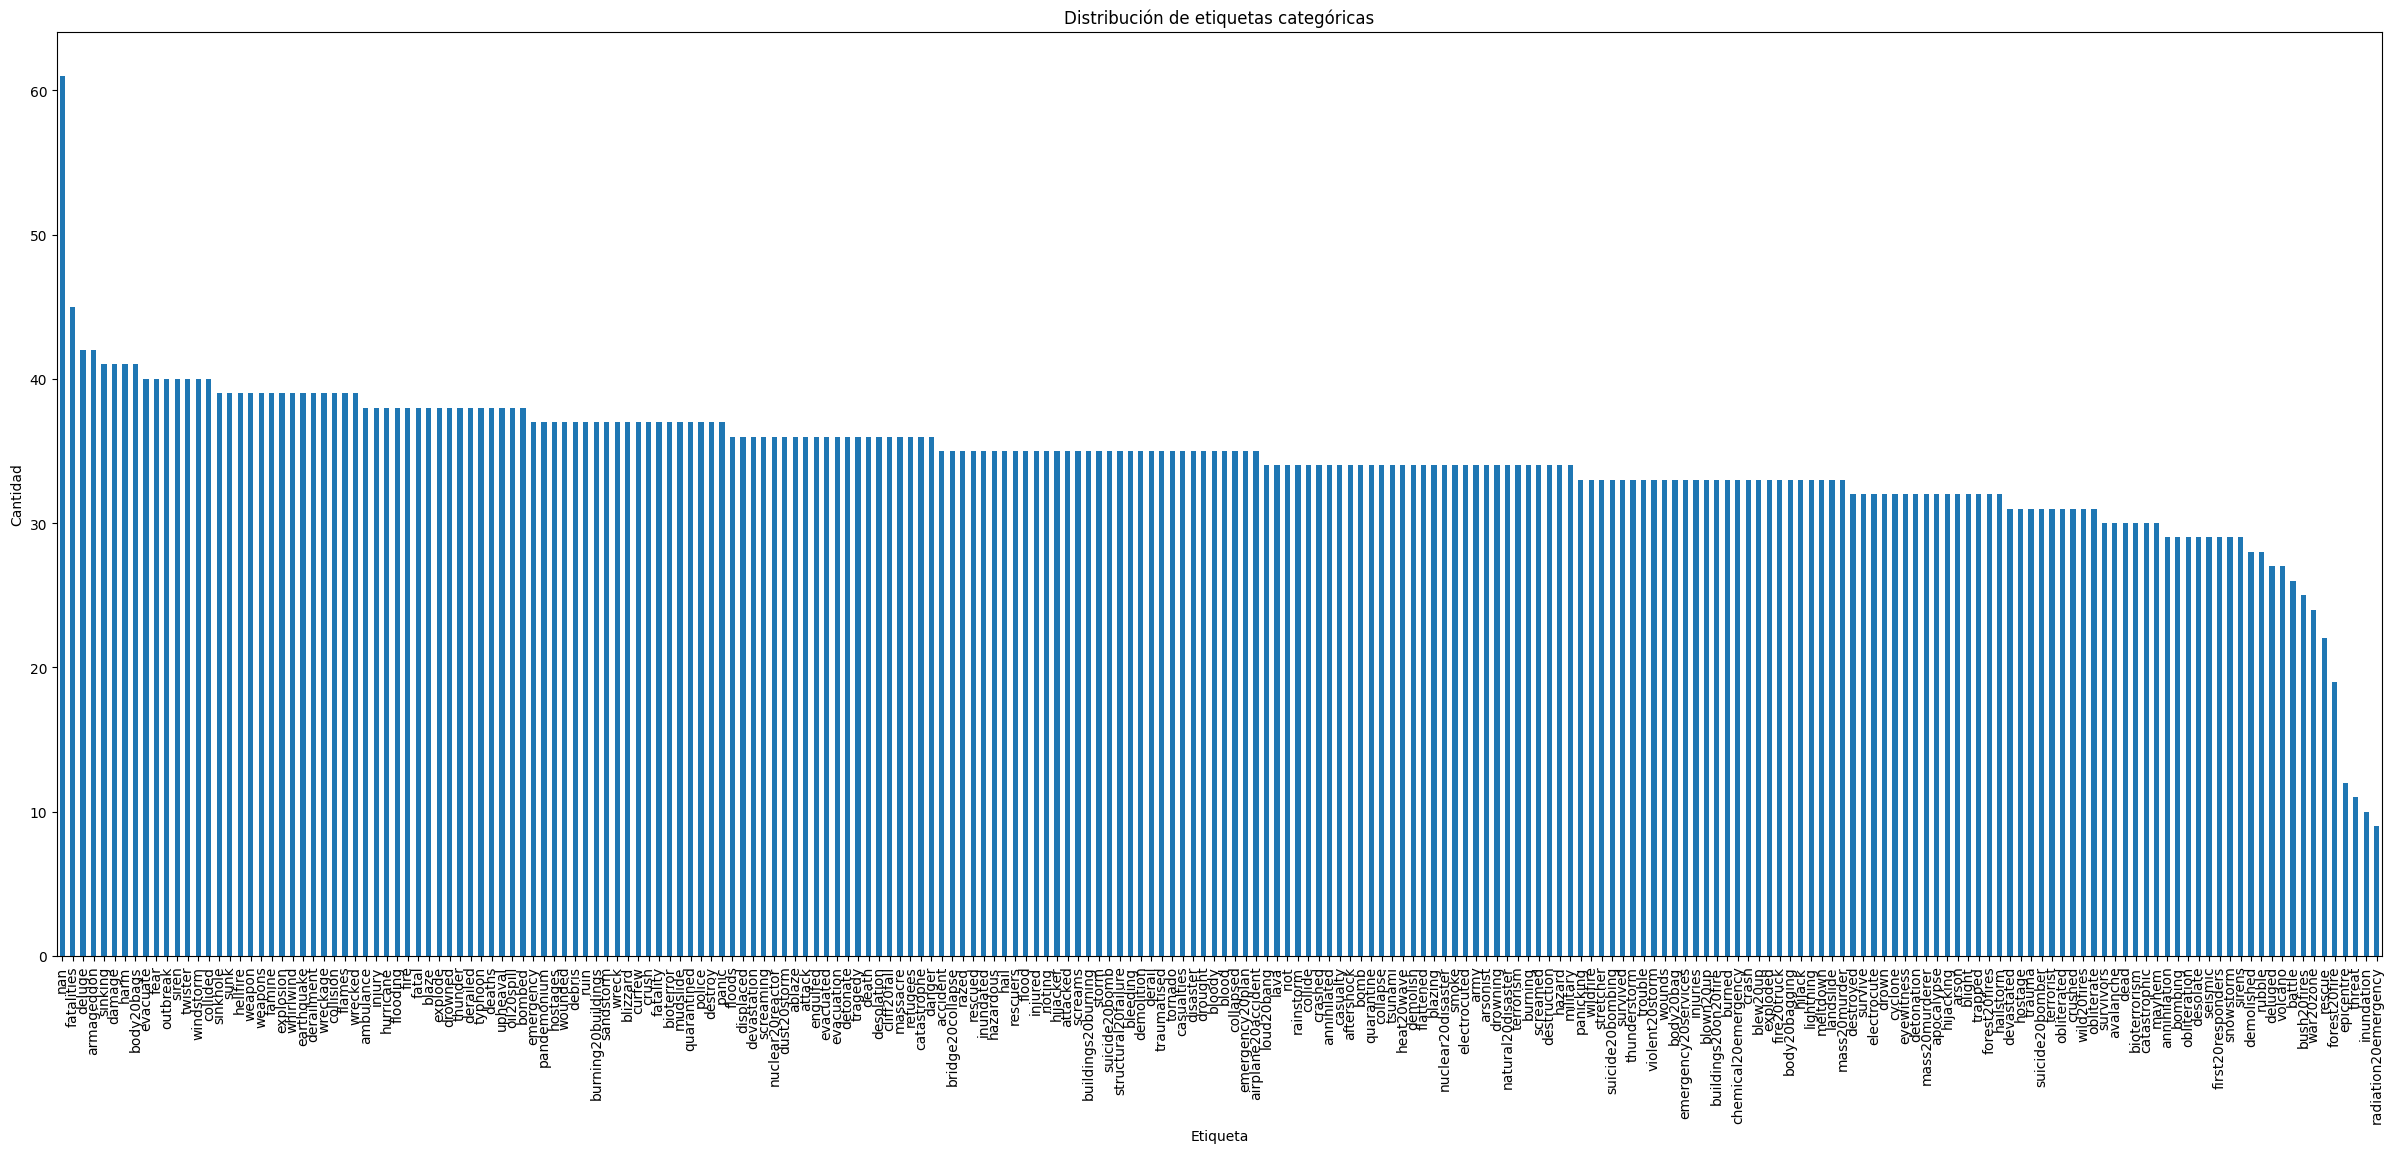

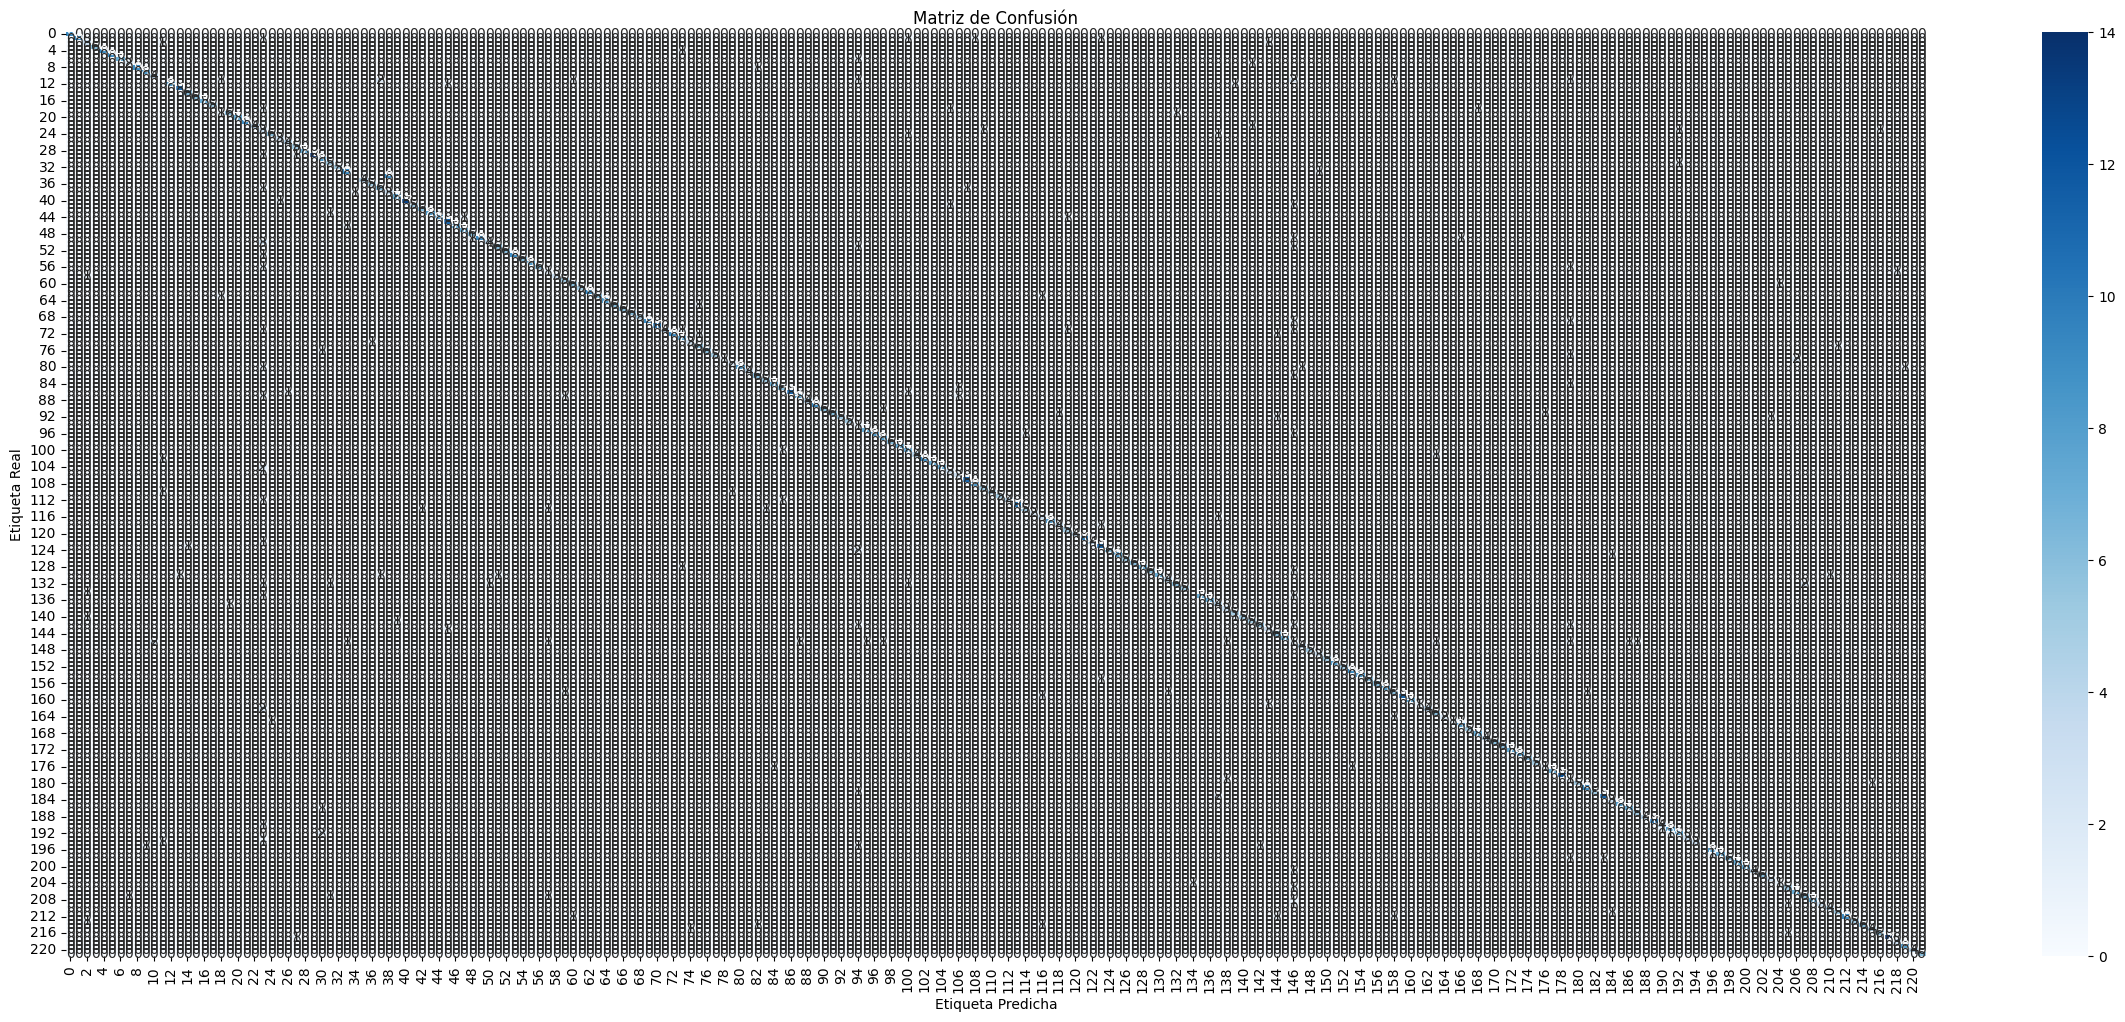

In [11]:
# Definiendo las características (X) y las etiquetas (y)
X = train['text']  # Usando la columna "text" como características
y = train['keyword']  # Usando la columna "keyword" como etiquetas

# Dividiendo el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizando el texto utilizando TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Características
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Entrenando el modelo de Bosques Aleatorios
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_vectorized, y_train)

# Predeciendo etiquetas en el conjunto de prueba
y_pred = model.predict(X_test_vectorized)

# Evaluando el modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Exactitud del modelo:", accuracy)
print("Informe de clasificación:\n", classification_rep)

# Visualizando la distribución de etiquetas categóricas
plt.figure(figsize=(30, 12))
keyword_counts = train['keyword'].value_counts()
keyword_counts.plot(kind='bar')
plt.xlabel('Etiqueta')
plt.ylabel('Cantidad')
plt.title('Distribución de etiquetas categóricas')
plt.xticks(rotation=90)
plt.show()

# Creando la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizando de la matriz de confusión utilizando seaborn
plt.figure(figsize=(30, 12))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()

# Ejercicio 4: Obtenga la frecuencia de las palabras tanto de los tweets de desastres como de los que no. ¿Qué palabras cree que le servirán para hacer un mejor modelo de clasificación?¿vale la pena explorar bigramas o trigramas para analizar contexto?

In [8]:
disaster_tweets = train[train['target'] == 1]['text']
non_disaster_tweets = train[train['target'] == 0]['text']

stop_words = set(stopwords.words('english'))

def get_most_common_ngrams(tweets, n=1, num=10):
    all_ngrams = []
    for tweet in tweets:
        tokens = word_tokenize(tweet)
        filtered = [w for w in tokens if w.isalnum() and w.lower() not in stop_words]
        
        tweet_ngrams = list(ngrams(filtered, n))
        all_ngrams.extend(tweet_ngrams)
        
    return Counter(all_ngrams).most_common(num)

def print_ngrams(ngram_list, title):
    print(title)
    print('-' * len(title))
    for ngram, count in ngram_list:
        # Esto une los n-gramas y muestra el recuento
        print(f"{' '.join(ngram):<20} : {count}")
    print()

# Unigramas
top_disaster_words = get_most_common_ngrams(disaster_tweets, n=1, num=15)
top_non_disaster_words = get_most_common_ngrams(non_disaster_tweets, n=1, num=15)

print_ngrams(top_disaster_words, "Top disaster words")
print_ngrams(top_non_disaster_words, "Top non-disaster words")

# Bigramas
top_disaster_bigrams = get_most_common_ngrams(disaster_tweets, n=2, num=15)
top_non_disaster_bigrams = get_most_common_ngrams(non_disaster_tweets, n=2, num=15)

print_ngrams(top_disaster_bigrams, "Top disaster bigrams")
print_ngrams(top_non_disaster_bigrams, "Top non-disaster bigrams")

# Trigramas
top_disaster_trigrams = get_most_common_ngrams(disaster_tweets, n=3, num=15)
top_non_disaster_trigrams = get_most_common_ngrams(non_disaster_tweets, n=3, num=15)

print_ngrams(top_disaster_trigrams, "Top disaster trigrams")
print_ngrams(top_non_disaster_trigrams, "Top non-disaster trigrams")


Top disaster words
------------------
fire                 : 180
news                 : 136
via                  : 121
disaster             : 117
california           : 111
suicide              : 110
police               : 107
amp                  : 106
people               : 105
killed               : 93
like                 : 92
hiroshima            : 86
storm                : 85
crash                : 84
fires                : 84

Top non-disaster words
----------------------
like                 : 253
im                   : 248
amp                  : 192
new                  : 170
get                  : 163
dont                 : 154
one                  : 128
body                 : 113
via                  : 99
would                : 97
video                : 96
got                  : 91
people               : 91
love                 : 90
cant                 : 86

Top disaster bigrams
--------------------
suicide bomber       : 59
northern california  : 41
oil spill            : 

# Ejercicio 5: Haga un análisis exploratorio de los datos para entenderlos mejor, documente todos los análisis

### Investigando que palabras son las que más se repiten.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sebas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


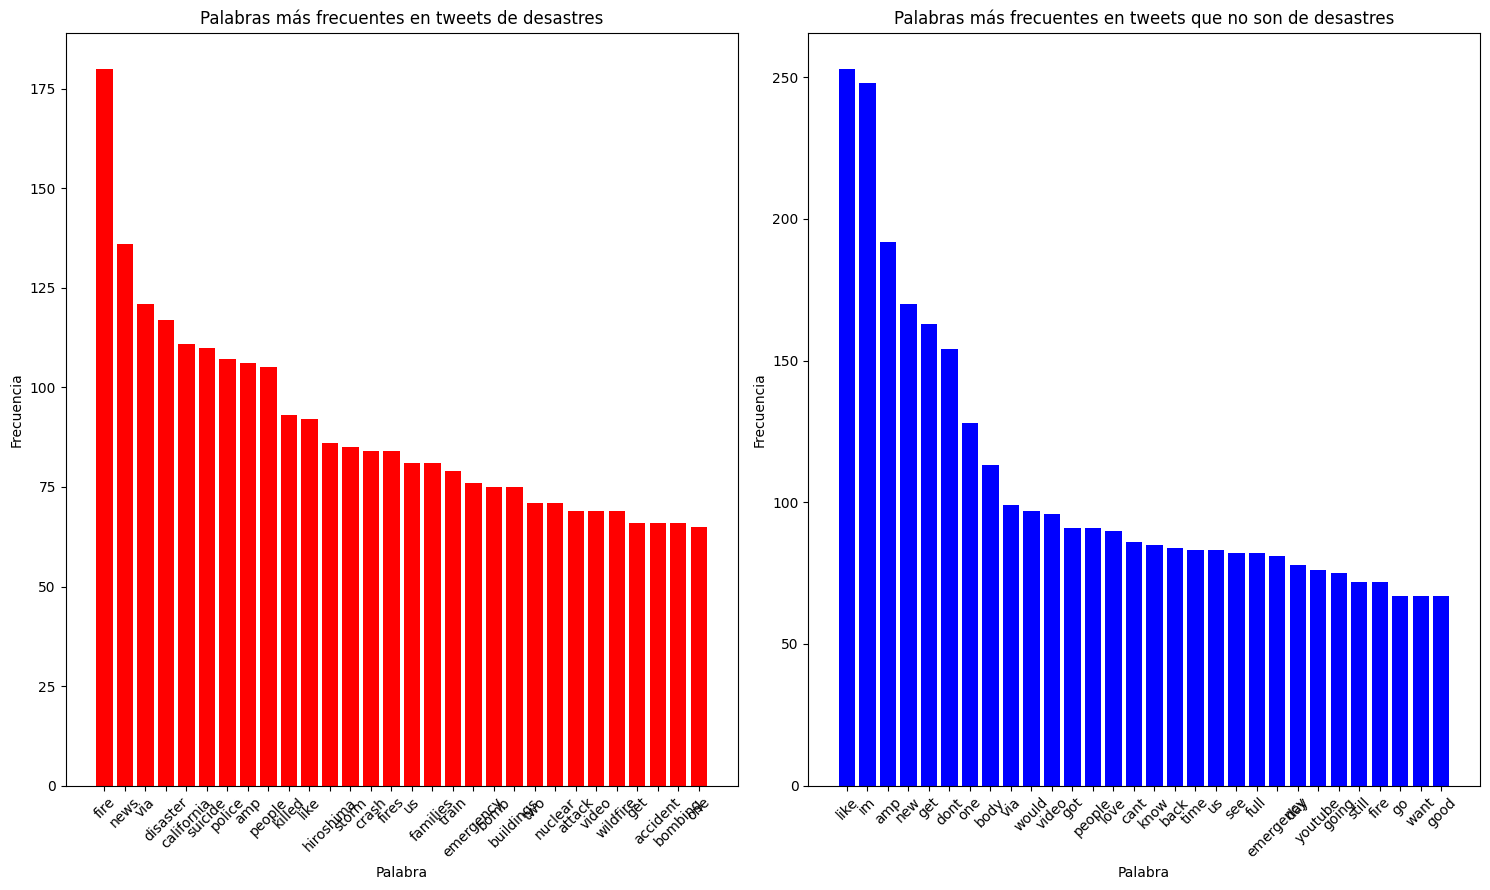

In [14]:
# Descargando las stopwords si aún no están descargadas
nltk.download('stopwords')

# Filtrando stopwords en inglés
stop_words = set(stopwords.words('english'))

# Función para procesar y obtener frecuencia de palabras
def get_word_frequency(text):
    words = nltk.word_tokenize(text)  # Tokenizar el texto en palabras
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]  # Filtrar palabras no alfanuméricas y stopwords
    return Counter(words)  # Contar la frecuencia de cada palabra

# Filtrar los datos según la columna de destino (target)
disaster_tweets = train[train['target'] == 1]['text']
non_disaster_tweets = train[train['target'] == 0]['text']

disaster_word_frequency = Counter()  # Frecuencia de palabras para tweets de desastres
non_disaster_word_frequency = Counter()  # Frecuencia de palabras para tweets que no son de desastres

for tweet in disaster_tweets:
    disaster_word_frequency += get_word_frequency(tweet)

for tweet in non_disaster_tweets:
    non_disaster_word_frequency += get_word_frequency(tweet)

# Obtener las palabras más comunes y sus frecuencias
top_disaster_words = disaster_word_frequency.most_common(30)
top_non_disaster_words = non_disaster_word_frequency.most_common(30)

# Creando histogramas
plt.figure(figsize=(15, 9))

# Histograma de palabras en tweets de desastres
plt.subplot(1, 2, 1)
plt.bar(*zip(*top_disaster_words), color='red')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes en tweets de desastres')
plt.xticks(rotation=45)

# Histograma de palabras en tweets que no son de desastres
plt.subplot(1, 2, 2)
plt.bar(*zip(*top_non_disaster_words), color='blue')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes en tweets que no son de desastres')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Haciendo una nube de palabras que más aparecen.

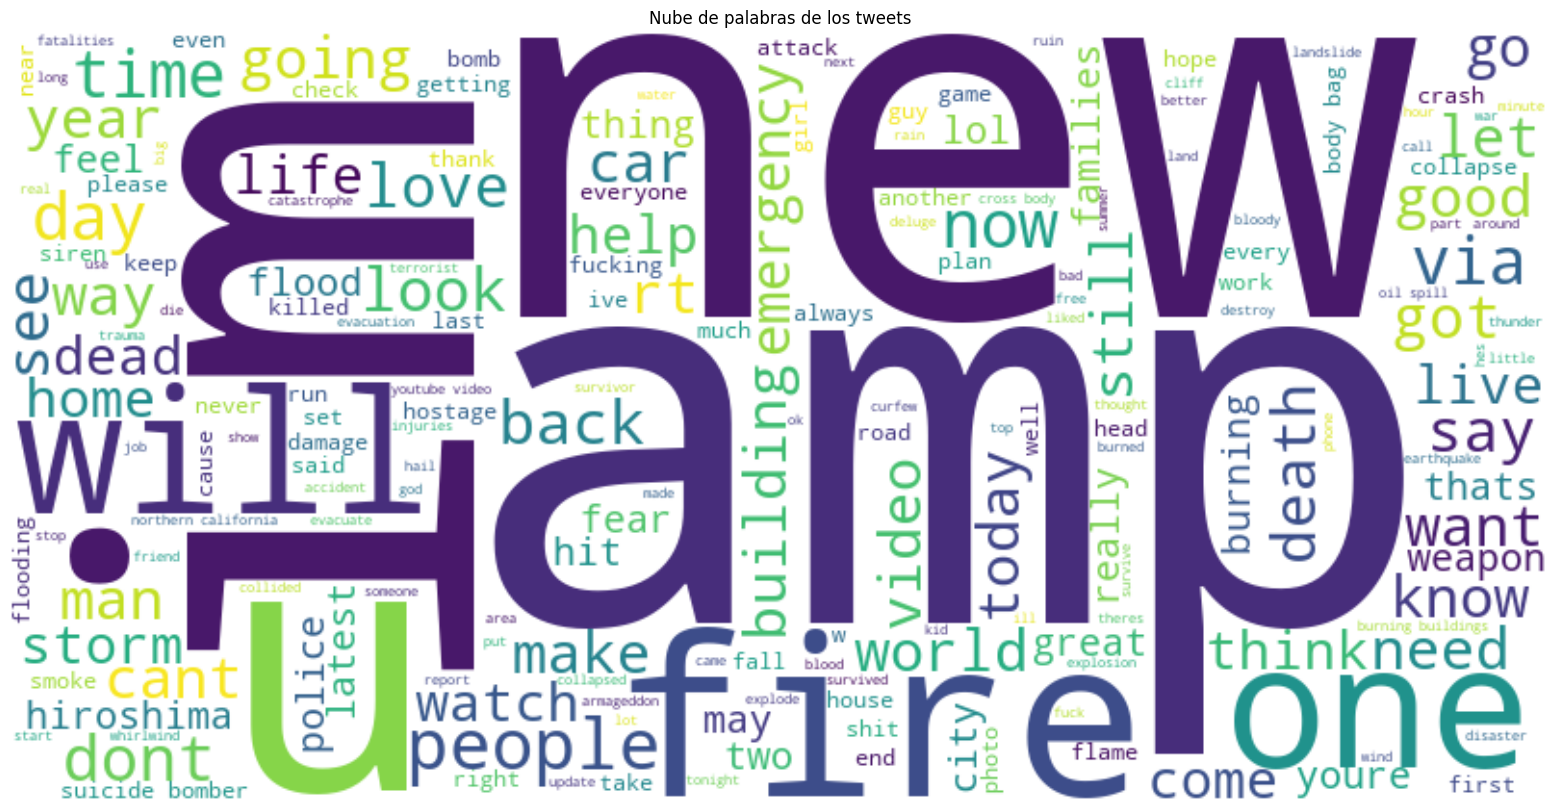

In [17]:
# Concatenando todos los textos de los tweets
all_tweets_text = ' '.join(train['text'])

# Creando una instancia de WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets_text)

# Visualizando la nube de palabras
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de los tweets')
plt.show()

### Haciendo un histograma de palabras que más se repiten.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sebas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sebas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


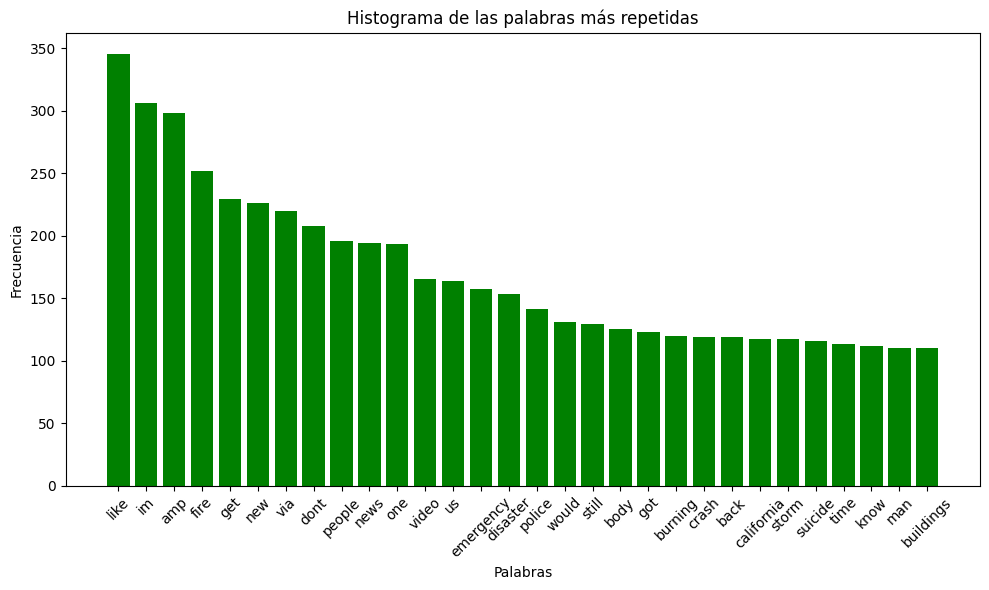

In [21]:
nltk.download('stopwords')
nltk.download('punkt')

# Concatenando todos los textos de los tweets
all_tweets_text = ' '.join(train['text'])

# Tokenizando el texto en palabras
words = nltk.word_tokenize(all_tweets_text)

# Filtrando stopwords en inglés
stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Obteniendo la frecuencia de las palabras
word_freq = Counter(filtered_words)

# Obteniendo las palabras más frecuentes y sus frecuencias
most_common_words = word_freq.most_common(30)
words, freqs = zip(*most_common_words)

# Creando el histograma
plt.figure(figsize=(10, 6))
plt.bar(words, freqs, color='green')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Histograma de las palabras más repetidas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### A lo largo del análisis del dataset, se pudo notar que las palabras que más frecuencia tuvieron fueron "fire", "news", "via" y "disaster", en la parte de desastres. Lo anterior nos indica, entonces, que las personas suelen publicar más contenido acerca de esos temas, dado que es lo que más ocurre. También se notó que las personas publican cosas como "like", "get" y "video", dado que se puede relacionar a actividades cotidianas, como lo puede ser un sorteo online, compras exitosas y/o videos útiles o recreativos.

### Determinando palabras positivas, negativas y neutras.

Polaridad: neutra, Cantidad: 21960
Polaridad: positiva, Cantidad: 233
Polaridad: negativa, Cantidad: 171


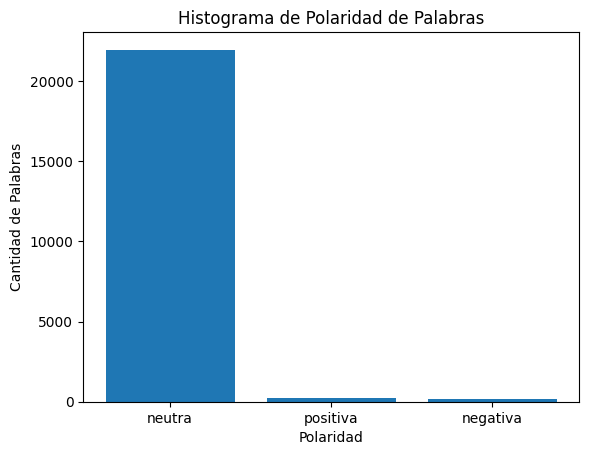

In [28]:
# Obteniendo las palabras más frecuentes en el conjunto de datos
all_text = ' '.join(train['text'])  # Concatenando todos los textos en un solo string
words = all_text.split()  # Dividiendo el string en palabras
word_frequencies = Counter(words)  # Contando la frecuencia de cada palabra

# Definiendo umbrales para determinar si es positiva, negativa o neutra
positive_threshold = 0.2
negative_threshold = -0.2

# Creando una función para determinar la polaridad de una palabra
def get_sentiment(word):
    blob = TextBlob(word)
    polarity = blob.sentiment.polarity
    
    if polarity > positive_threshold:
        return "positiva"
    elif polarity < negative_threshold:
        return "negativa"
    else:
        return "neutra"

# Analizando la polaridad de las palabras más frecuentes
word_sentiments = {word: get_sentiment(word) for word in word_frequencies.keys()}

# Contando la cantidad de palabras positivas, negativas y neutras
sentiment_counts = Counter(word_sentiments.values())

# Imprimiendo los conteos de polaridad
for sentiment, count in sentiment_counts.items():
    print(f"Polaridad: {sentiment}, Cantidad: {count}")

# Creando el histograma
plt.bar(sentiment_counts.keys(), sentiment_counts.values())
plt.xlabel('Polaridad')
plt.ylabel('Cantidad de Palabras')
plt.title('Histograma de Polaridad de Palabras')
plt.show()

# Ejercicio 6: Teniendo en cuenta la cantidad de palabras positivas y negativas del tweet determine qué tan positivo, negativo o neutral es el mismo. 

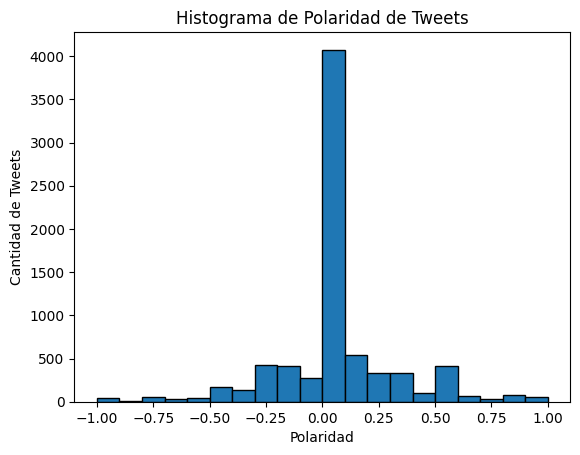

In [31]:
# Creando una lista para almacenar las polaridades de los tweets
tweet_polarities = []

# Analizando la polaridad de cada tweet
for text in train['text']:
    blob = TextBlob(text)
    tweet_polarities.append(blob.sentiment.polarity)

# Agregando la lista de polaridades como una nueva columna en el df.
train['polarity'] = tweet_polarities

# Histograma de las polaridades de los tweets
plt.hist(train['polarity'], bins=20, edgecolor='black')
plt.xlabel('Polaridad')
plt.ylabel('Cantidad de Tweets')
plt.title('Histograma de Polaridad de Tweets')
plt.show()

# Ejercicio 7.

## ¿Cuáles son los 10 tweets más negativos?¿En qué categoría están?